In [1]:
#load normalized data
import pandas as pd
df = pd.read_csv("cleaned_data.csv")

In [2]:
#show the columns
df.columns

Index(['PRICEEACH', 'SALES', 'MONTH_ID', 'YEAR_ID', 'STATE_', 'STATE_BC',
       'STATE_CA', 'STATE_CT', 'STATE_Isle of Wight', 'STATE_MA', 'STATE_NH',
       'STATE_NJ', 'STATE_NSW', 'STATE_NV', 'STATE_NY', 'STATE_Osaka',
       'STATE_PA', 'STATE_Quebec', 'STATE_Queensland', 'STATE_Tokyo',
       'STATE_Victoria', 'COUNTRY_Australia', 'COUNTRY_Austria',
       'COUNTRY_Belgium', 'COUNTRY_Canada', 'COUNTRY_Denmark',
       'COUNTRY_Finland', 'COUNTRY_France', 'COUNTRY_Germany',
       'COUNTRY_Ireland', 'COUNTRY_Italy', 'COUNTRY_Japan', 'COUNTRY_Norway',
       'COUNTRY_Philippines', 'COUNTRY_Singapore', 'COUNTRY_Spain',
       'COUNTRY_Sweden', 'COUNTRY_Switzerland', 'COUNTRY_UK', 'COUNTRY_USA',
       'DEALSIZE_Large', 'DEALSIZE_Medium', 'DEALSIZE_Small'],
      dtype='object')

In [3]:
from sklearn import linear_model
#split the dataframe X - predictors and y - target
X = df.drop('SALES', axis=1)
y = df['SALES']

In [4]:
 X.columns

Index(['PRICEEACH', 'MONTH_ID', 'YEAR_ID', 'STATE_', 'STATE_BC', 'STATE_CA',
       'STATE_CT', 'STATE_Isle of Wight', 'STATE_MA', 'STATE_NH', 'STATE_NJ',
       'STATE_NSW', 'STATE_NV', 'STATE_NY', 'STATE_Osaka', 'STATE_PA',
       'STATE_Quebec', 'STATE_Queensland', 'STATE_Tokyo', 'STATE_Victoria',
       'COUNTRY_Australia', 'COUNTRY_Austria', 'COUNTRY_Belgium',
       'COUNTRY_Canada', 'COUNTRY_Denmark', 'COUNTRY_Finland',
       'COUNTRY_France', 'COUNTRY_Germany', 'COUNTRY_Ireland', 'COUNTRY_Italy',
       'COUNTRY_Japan', 'COUNTRY_Norway', 'COUNTRY_Philippines',
       'COUNTRY_Singapore', 'COUNTRY_Spain', 'COUNTRY_Sweden',
       'COUNTRY_Switzerland', 'COUNTRY_UK', 'COUNTRY_USA', 'DEALSIZE_Large',
       'DEALSIZE_Medium', 'DEALSIZE_Small'],
      dtype='object')

In [5]:
#split dataset into test/train 
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=4)

In [6]:
#fit the model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
#make the predictions
predictions = lm.predict(X_test)
print(lm.score(X_test,y_test))
#the score is 0.82 which is not bad (R2 squared, closer to 1 is better)

0.8221097525698253


-495126036082.36365
[ 1.30761282e-01  1.07710136e-02  9.95787341e-03 -8.53460295e+09
 -1.80342218e+10  1.89787802e+10  1.89787802e+10 -8.53460295e+09
  1.89787802e+10  1.89787802e+10  1.89787802e+10 -8.14068196e+10
  1.89787802e+10  1.89787802e+10  2.13768189e+10  1.89787802e+10
 -1.80342218e+10 -8.14068196e+10  2.13768189e+10 -8.14068196e+10
  5.75601727e+10 -1.53120439e+10 -1.53120439e+10 -5.81242507e+09
 -1.53120439e+10 -1.53120439e+10 -1.53120439e+10 -1.53120439e+10
 -1.53120439e+10 -1.53120439e+10 -4.52234658e+10 -1.53120439e+10
 -1.53120439e+10 -1.53120439e+10 -1.53120439e+10 -1.53120439e+10
 -1.53120439e+10 -1.53120439e+10 -4.28254271e+10  5.18972683e+11
  5.18972683e+11  5.18972683e+11]
                      Coefficient
PRICEEACH            1.307613e-01
MONTH_ID             1.077101e-02
YEAR_ID              9.957873e-03
STATE_              -8.534603e+09
STATE_BC            -1.803422e+10
STATE_CA             1.897878e+10
STATE_CT             1.897878e+10
STATE_Isle of Wight -8.5

Text(0.5, 1.0, 'Feature importance using Linear Regression')

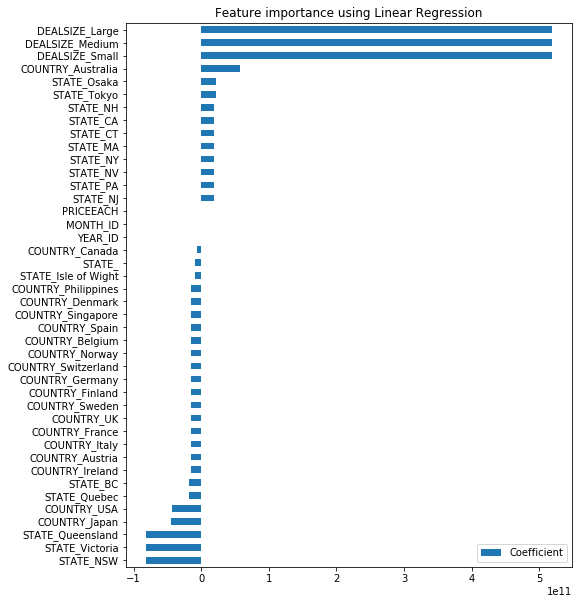

In [7]:
#show the intercept
print(model.intercept_)

#show the slope
print(model.coef_)

#show coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)
imp_coef = coeff_df.sort_values(by='Coefficient')
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression")
#As it can be seen in the plot, the coefficient for priceeach, month and year are not important for the model 
#it has more influence the deal size, and certain countries. 

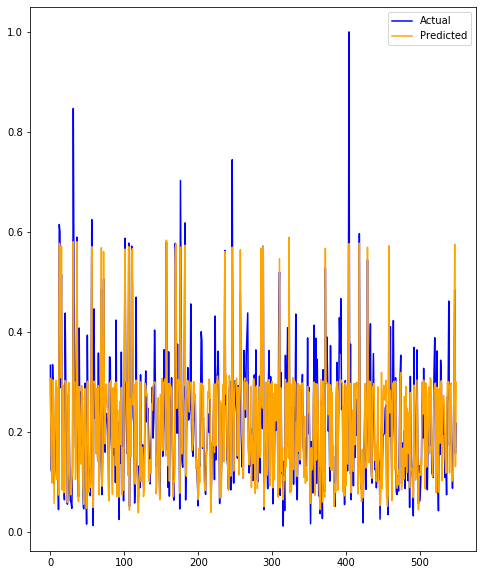

In [8]:
#plot actual vs predicted values
fig, ax = plt.subplots()
ax.plot(y_test.to_numpy(), color = 'blue')
ax.plot(predictions, color = 'orange')
ax.legend(['Actual', 'Predicted'])
plt.show()
#it can be seen in the graph that higher values are not well predicted, means that the algorithm is not learning correctly 
#further investigation will be needed to correct this error in the prediction
#several issues can be the reason for this problem. 
#For instance, it might be problems in the division of the training/test sets, 
#it may be needed to remove some variables, or put more weight in certain variables 
#you can also apply cross-validation to try to improve the performance
#another option to try is to use ridge regression setting different alpha parameters 

0.8586757570997903


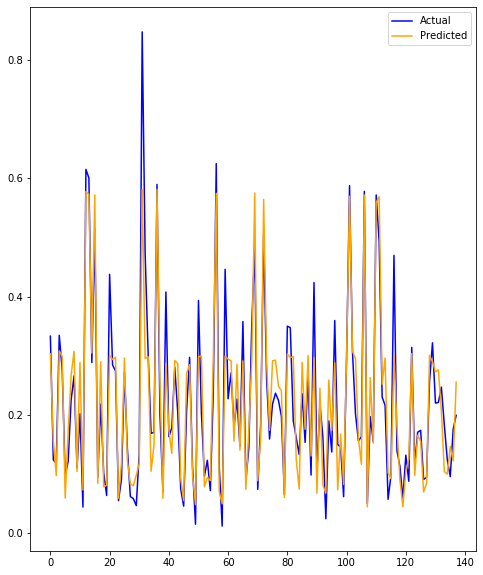

In [51]:
#example with Ridge reggression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
predictions = rr.predict(X_test)
print(rr.score(X_test, y_test))
fig, ax = plt.subplots()
ax.plot(y_test.to_numpy(), color = 'blue')
ax.plot(predictions, color = 'orange')
ax.legend(['Actual', 'Predicted'])
plt.show()